# R을 사용한 K-means 군집 분석
 - http://www.dodomira.com/2016/02/20/r%EC%9D%84-%EC%82%AC%EC%9A%A9%ED%95%9C-k-means-%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D-k-means-clustering-in-r/ 참고 

In [1]:
install.packages("caret", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'iterators', 'foreach'



package 'iterators' successfully unpacked and MD5 sums checked
package 'foreach' successfully unpacked and MD5 sums checked
package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\Rtmp6vn4ns\downloaded_packages


# 데이터 준비
    우선 caret 패키지의 createDataPartition 함수를 사용해서 iris 데이터를 
    training / testing 데이터 셋으로 구분해 봅시다. training 데이터로 모델을 만들고, 
    testing 데이터로 모델을 평가 하기 위한 사전 작업입니다.

In [7]:
library(caret)
data(iris)
head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [8]:
set.seed(123)

inTrain <- createDataPartition(y=iris$Species, p=0.7, list=FALSE)
training <- iris[inTrain,]
testing <- iris[-inTrain,]

In [9]:
str(training)

'data.frame':	105 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.7 4.6 4.6 4.4 5.4 4.8 4.3 5.8 ...
 $ Sepal.Width : num  3.5 3 3.2 3.1 3.4 2.9 3.7 3 3 4 ...
 $ Petal.Length: num  1.4 1.4 1.3 1.5 1.4 1.4 1.5 1.4 1.1 1.2 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.3 0.2 0.2 0.1 0.1 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [10]:
str(testing)

'data.frame':	45 obs. of  5 variables:
 $ Sepal.Length: num  5 5.4 5 4.9 4.8 5.7 5.4 5.2 5.2 5.5 ...
 $ Sepal.Width : num  3.6 3.9 3.4 3.1 3.4 4.4 3.9 3.4 4.1 4.2 ...
 $ Petal.Length: num  1.4 1.7 1.5 1.5 1.6 1.5 1.3 1.4 1.5 1.4 ...
 $ Petal.Width : num  0.2 0.4 0.2 0.1 0.2 0.4 0.4 0.2 0.1 0.2 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


# 표준화
     K-means 군집 분석은 관측치 간의 거리를 이용하기 때문에 변수의 단위가 결과에 큰 영향을 미칩니다.  
     그래서 변수를 표준화 하는 작업이 필요한데요, scale 함수를 사용해서 iris 데이터를 표준화 해 보겠습니다.

In [11]:
training.data <- scale(training[-5])  # factor 요소 제외 
summary(training.data)

  Sepal.Length       Sepal.Width        Petal.Length      Petal.Width     
 Min.   :-1.74163   Min.   :-2.57884   Min.   :-1.5421   Min.   :-1.4303  
 1st Qu.:-0.83745   1st Qu.:-0.58599   1st Qu.:-1.2103   1st Qu.:-1.1698  
 Median :-0.04629   Median :-0.08778   Median : 0.3381   Median : 0.1327  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.63185   3rd Qu.: 0.65954   3rd Qu.: 0.7805   3rd Qu.: 0.7840  
 Max.   : 2.32720   Max.   : 2.40328   Max.   : 1.7206   Max.   : 1.6958  

# 모델 작성
    training 데이터셋으로 iris 데이터를 3개의 군집으로 나누어 봅시다.

In [12]:
iris.kmeans <- kmeans(training.data[,-5], centers = 3, iter.max = 10000)

In [13]:
summary(iris.kmeans)

             Length Class  Mode   
cluster      105    -none- numeric
centers       12    -none- numeric
totss          1    -none- numeric
withinss       3    -none- numeric
tot.withinss   1    -none- numeric
betweenss      1    -none- numeric
size           3    -none- numeric
iter           1    -none- numeric
ifault         1    -none- numeric

In [14]:
iris.kmeans$centers

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
1,0.01167492,-0.89258505,0.35087910,0.27634632
2,1.1422803,0.2738255,1.0159839,1.0529085
3,-1.0247432,0.7520636,-1.2908510,-1.2405049


# 군집 확인

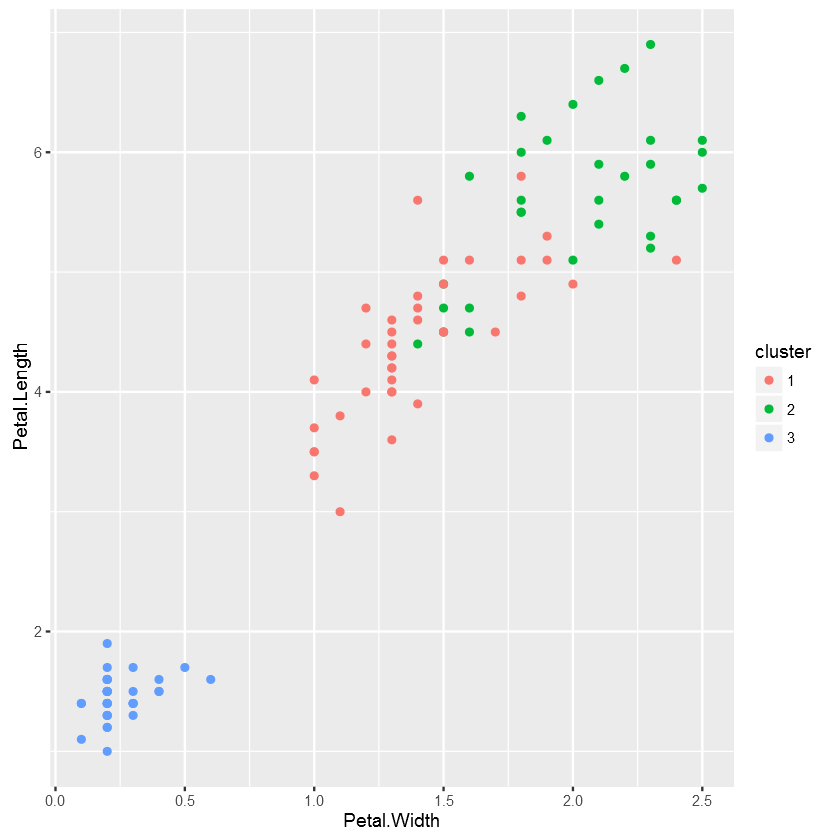

In [15]:
training$cluster<-as.factor(iris.kmeans$cluster)
qplot(Petal.Width,Petal.Length,colour=cluster,data=training)

In [36]:
table(training$Species, training$cluster)

            
              1  2  3
  setosa      0 35  0
  versicolor 29  0  6
  virginica  10  0 25

 - 결과를 보니 setosa는 잘 분류해 내었지만 versicolor나 virginica 종은 잘 구분해 내지 못한 것 같네요.

# 군집 중심의 갯수 결정 
    K-means 군집분석에서는 입력하는 변수와 함께 중심의 갯수를 지정하는 것이 중요한데요, 
    몇개의 군집 중심이 적당한지 결정하는 방법에는 여러가지가 있습니다. 그중 자주 사용하는 
    NbClust 패키지를 사용하는 방법과 군집 내 sum of squares를 사용하는 방법이 있습니다.

In [4]:
install.packages("NbClust", repos = "http://cran.us.r-project.org") 

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)


package 'NbClust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\Rtmp6vn4ns\downloaded_packages


In [5]:
library(NbClust)

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


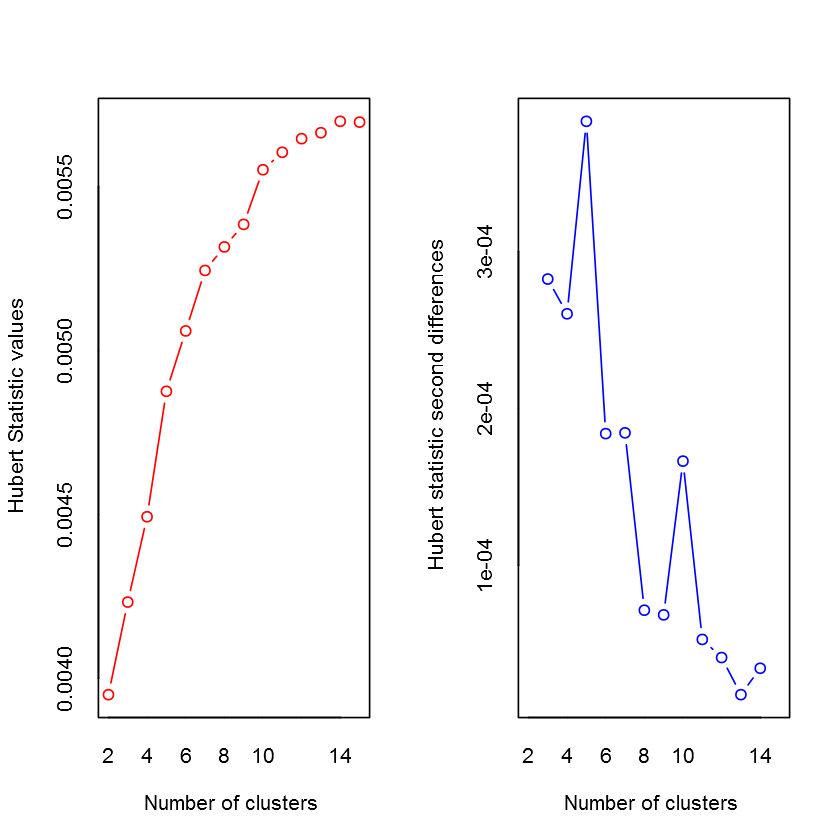

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 7 proposed 2 as the best number of clusters 
* 10 proposed 3 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 2 proposed 8 as the best number of clusters 
* 1 proposed 10 as the best number of clusters 
* 2 proposed 14 as the best number of clusters 
* 1 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  3 
 
 
******************************************************************* 


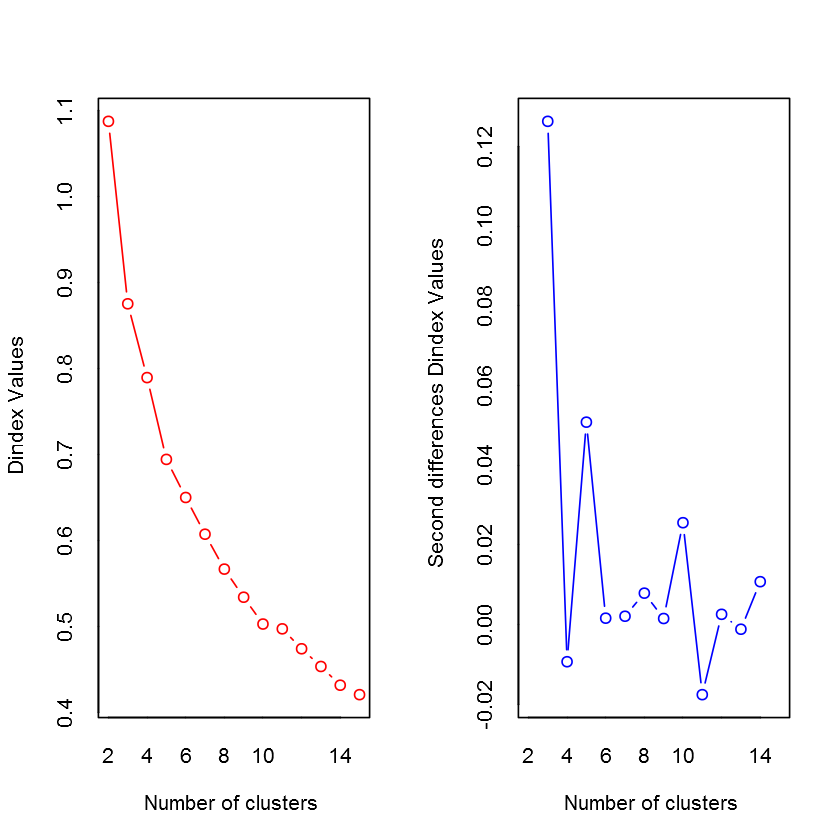

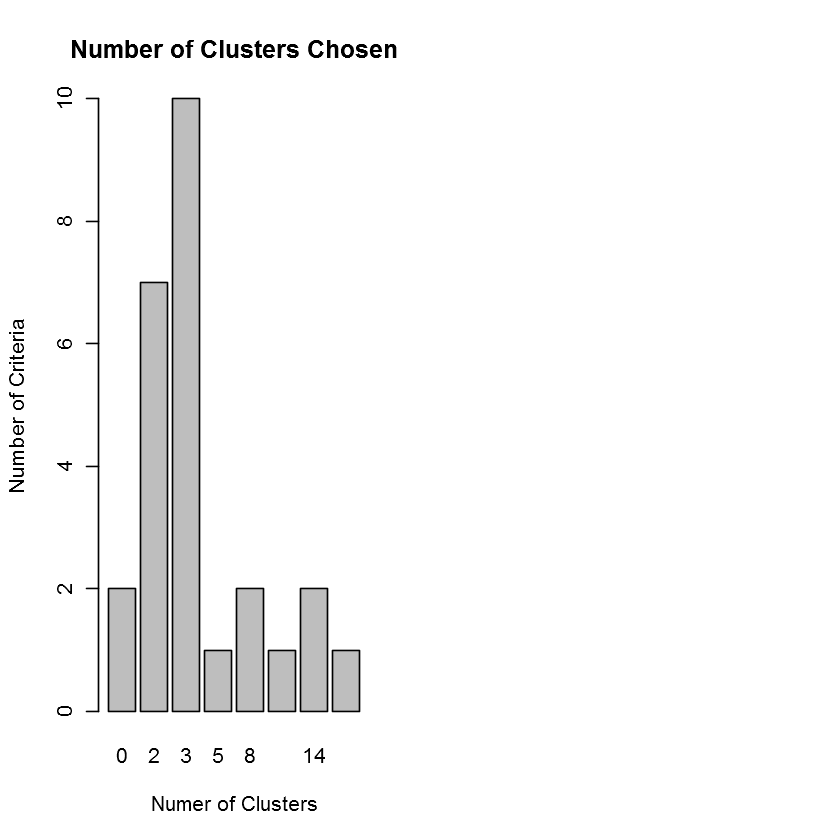

In [17]:
nc <- NbClust(training.data, min.nc=2, max.nc=15, method="kmeans")
barplot(table(nc$Best.n[1,]),
 xlab="Numer of Clusters", ylab="Number of Criteria",
 main="Number of Clusters Chosen")

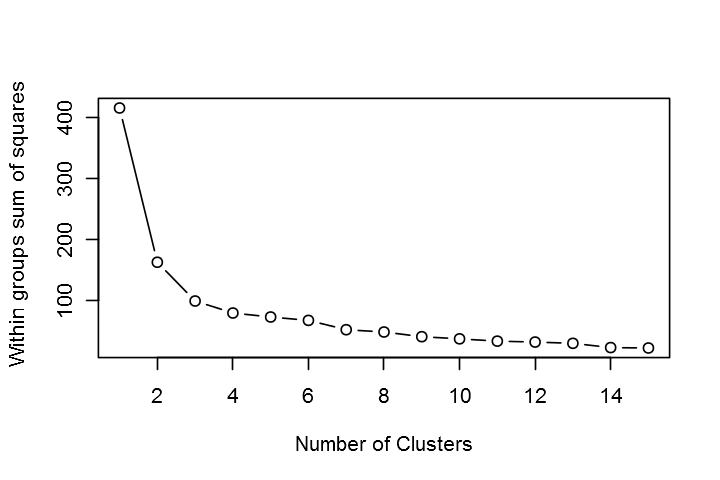

In [23]:
options(repr.plot.width = 6, repr.plot.height=4)
wssplot <- function(data, nc=15, seed=1234){
  wss <- (nrow(data)-1)*sum(apply(data,2,var))
  for (i in 2:nc){
    set.seed(seed)
    wss[i] <- sum(kmeans(data, centers=i)$withinss)}
  plot(1:nc, wss, type="b", xlab="Number of Clusters",
       ylab="Within groups sum of squares")}
 
wssplot(training.data)

In [26]:
install.packages('e1071', dependencies=TRUE, repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/byung/Documents/R/win-library/3.3'
(as 'lib' is unspecified)
also installing the dependencies 'randomForest', 'xtable'



package 'randomForest' successfully unpacked and MD5 sums checked
package 'xtable' successfully unpacked and MD5 sums checked
package 'e1071' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\byung\AppData\Local\Temp\Rtmp6vn4ns\downloaded_packages


In [27]:
library(e1071)

In [28]:
training.data<-as.data.frame(training.data)
modFit <- train(x=training.data[,-5],
                y=training$cluster,
                method="rpart")

In [29]:
testing.data<-as.data.frame(scale(testing[-5]))
testClusterPred <- predict(modFit,testing.data) 
table(testClusterPred ,testing$Species)

               
testClusterPred setosa versicolor virginica
              1      0         11         5
              2      0          4        10
              3     15          0         0

    역시 setosa는 정확히 분류해 내지만 versicolor나 virginica에 대해서는 변별력이 약한 모습이네요.